In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy

from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

In [5]:
import statistics
import math
from scipy import stats

## 1. Carregando base de dados

In [6]:
general = pd.read_csv('src/CC GENERAL.csv')

In [7]:
general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
general

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## 2. Tranformação dos Dados

### 2.1 - Coluna de id dos clientes transformada em índice do dataframe

In [9]:
general.set_index('CUST_ID', drop=True, inplace=True)

### 2.3 - Tratamento dos Dados NAN

#### 2.3.1 - Retirando todas as linhas com NANs

In [10]:
general_without_nan = general.dropna(axis = 0)

#### 2.3.2 Tratando NANs da Coluna MINIMUM_PAYMENTS - Média

In [11]:
general.loc[general['MINIMUM_PAYMENTS'].isna()].shape[0] / general.shape[0] * 100

3.4972067039106145

In [12]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [13]:
general_with_mean = general.copy()

In [14]:
general_with_mean['MINIMUM_PAYMENTS'] = mean_imputer.fit_transform(general_with_mean[['MINIMUM_PAYMENTS']])

In [15]:
general_with_mean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


#### 2.3.2 Tratando NANs da Coluna MINIMUM_PAYMENTS - Zero

In [16]:
general_with_zero = general.copy()

In [17]:
general_with_zero['MINIMUM_PAYMENTS'] = general_with_zero['MINIMUM_PAYMENTS'].fillna(0)

#### 2.3.3 - Retirando os NANs da Coluna - CREDIT_LIMIT nos Dataframes - general_with_mean / general_with_zero

In [18]:
general.loc[general['CREDIT_LIMIT'].isna()].shape[0]

1

In [19]:
general_with_mean = general_with_mean.dropna(axis = 0)

In [20]:
general_with_zero = general_with_zero.dropna(axis = 0)

### 2.2 - Tratamento de Outliers

In [107]:
def analise_outliers(df):
    fig, axes = plt.subplots(4,5, figsize=(25,40))

    n_column = 0
    for i in range(0,4):
        for j in range(0,5):
            if i == 3 and j == 2:
                break
            else:
                axes[i,j].boxplot(x = df.iloc[:, n_column], data = df)
                axes[i, j].set_title(general.columns[n_column])
                n_column += 1

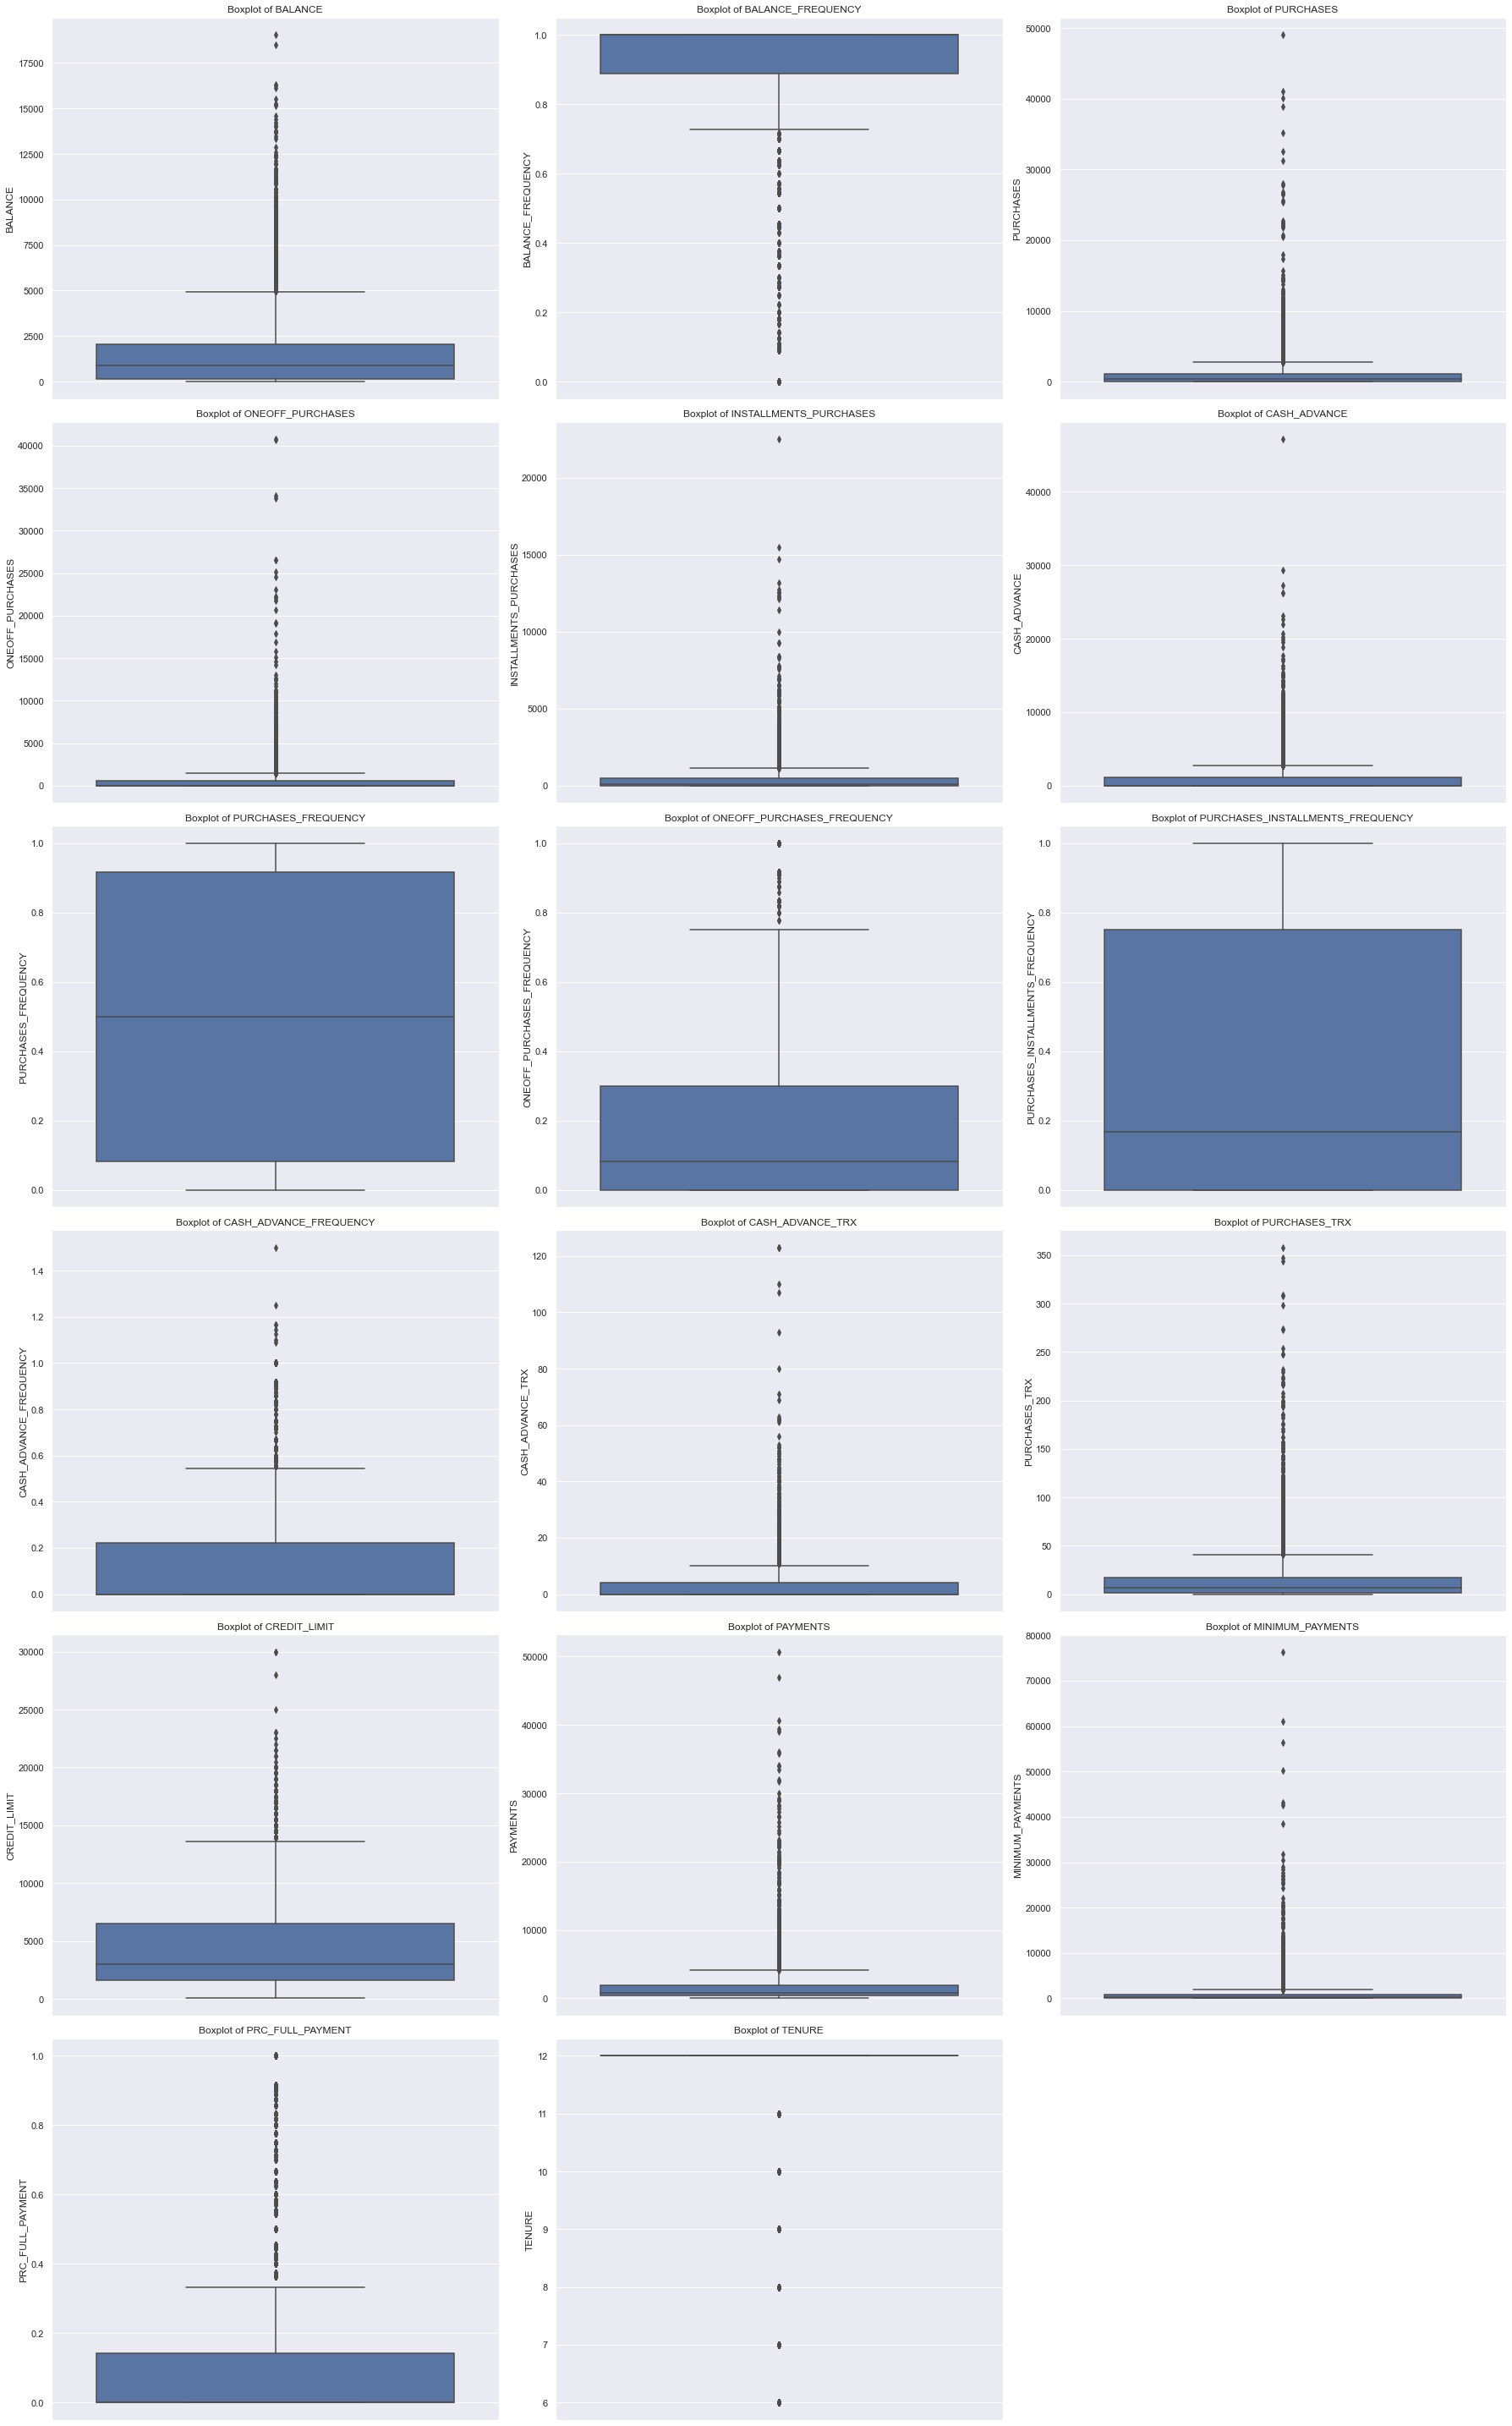

In [47]:
plt.figure(figsize = (25,40))
Features = general_with_mean.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = general_with_mean[Features[i]], data = general_with_mean)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

In [48]:
general_with_mean['BALANCE'].quantile()

873.680279

In [49]:
general_with_mean['BALANCE'].median()

873.680279

In [50]:
general_with_mean['BALANCE'].quantile([0.25,0.75])

0.25     128.365782
0.75    2054.372848
Name: BALANCE, dtype: float64

In [51]:
def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    ric = Q3 - Q1
    li = Q1 - (1.5 * ric)
    ls = Q3 + (1.5 * ric)
    return li, ls

In [62]:
general_without_outlies = general_with_mean.copy()

In [63]:
columns_list = general_without_outlies.columns
for i in columns_list:
    li, ls = detect_outliers(general_without_outlies[i])
    general_without_outlies[i] = np.where(general_without_outlies[i] > ls, ls,general_without_outlies[i])
    general_without_outlies[i] = np.where(general_without_outlies[i] < li, li,general_without_outlies[i])

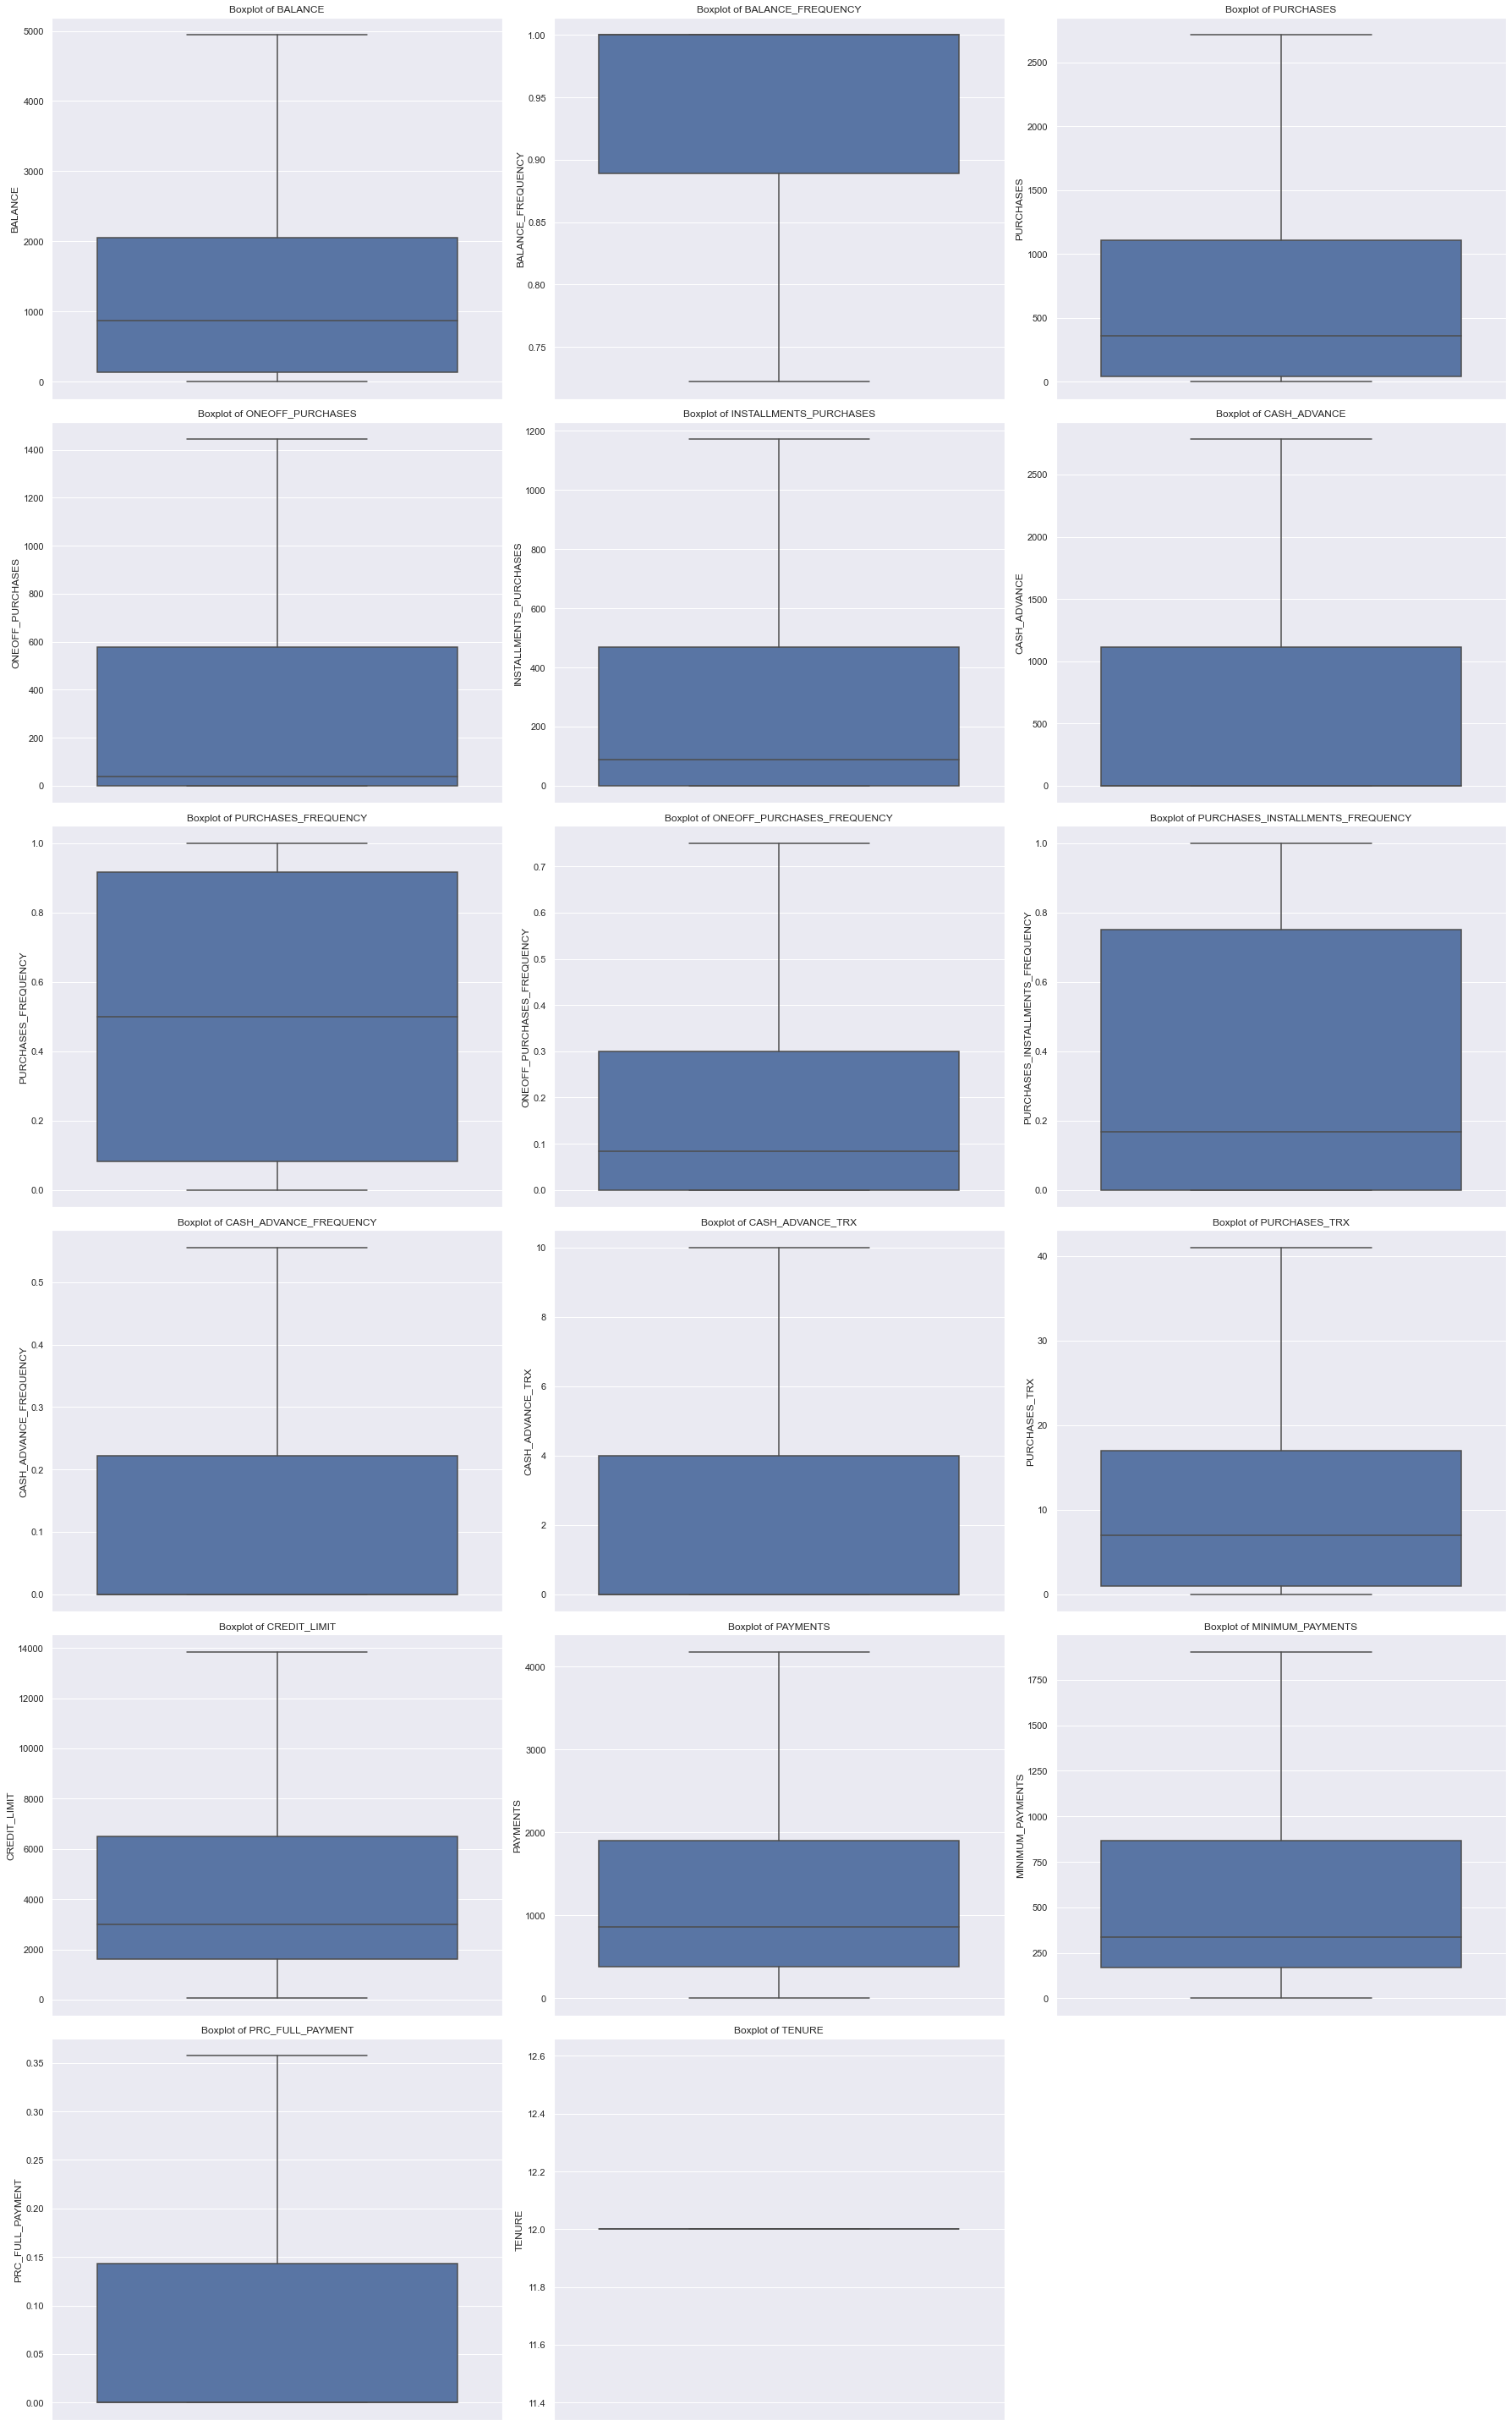

In [66]:
plt.figure(figsize = (25,40))
Features = general_without_outlies.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = general_without_outlies[Features[i]], data = general_without_outlies)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

### 2.4 - Padronização das Variáveis

In [78]:
general_scaled = general_without_outlies.copy()

general_scaled.iloc[:, :] = StandardScaler().fit_transform(general_without_outlies)

In [79]:
general_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-0.877887,-1.022232,-0.729778,-0.692329,-0.505286,-0.673526,-0.806649,-0.722810,-0.707409,-0.730019,-0.697305,-0.738061,-1.010503,-0.899957,-0.794165,-0.629326,0.0
C10002,1.178347,-0.202948,-0.838253,-0.692329,-0.746088,2.115243,-1.221928,-0.722810,-0.917090,0.717780,0.473022,-0.891422,0.762675,2.165124,0.836651,0.973858,0.0
C10003,0.718318,0.616337,0.040879,0.817575,-0.746088,-0.673526,1.269742,2.210769,-0.917090,-0.730019,-0.697305,0.028748,0.910439,-0.569767,0.058585,-0.629326,0.0
C10004,0.179488,-1.887032,0.866182,2.128745,-0.746088,-0.467436,-1.014290,-0.396858,-0.917090,-0.247421,-0.404724,-0.814741,0.910439,-1.058507,0.472782,-0.629326,0.0
C10005,-0.372660,0.616337,-0.820060,-0.661083,-0.746088,-0.673526,-1.014290,-0.396858,-0.917090,-0.730019,-0.697305,-0.814741,-0.951397,-0.525559,-0.610107,-0.629326,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,-0.885957,0.616337,-0.507235,-0.692329,-0.011263,-0.673526,1.269742,-0.722810,1.179720,-0.730019,-0.697305,-0.431337,-1.010503,-0.802697,-0.952597,1.947220,0.0
C19187,-0.892012,0.616337,-0.497138,-0.692329,0.011151,-0.673526,1.269742,-0.722810,1.179720,-0.730019,-0.697305,-0.431337,-1.010503,-0.841770,0.472782,-0.629326,0.0
C19188,-0.889270,-0.885689,-0.674063,-0.692329,-0.381604,-0.673526,0.854463,-0.722810,0.760359,-0.730019,-0.697305,-0.508018,-1.010503,-0.994655,-0.893975,1.174258,0.0


## 3. Análises dos Dados

### 3.1 - Principais Estatísticas

In [101]:
general_without_outlies.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,group
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.0,8949.000000
mean,1390.697731,0.931610,737.218384,354.518008,295.582267,672.536861,0.490405,0.184794,0.364478,0.126057,2.383283,11.625098,4419.295802,1347.265509,593.773985,0.087233,12.0,0.744776
std,1537.637836,0.110968,879.519446,512.094173,396.198058,998.586486,0.401360,0.255675,0.397451,0.172686,3.418038,13.041795,3383.944461,1272.869575,572.034178,0.138621,0.0,0.841287
min,0.000000,0.722223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,12.0,0.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.0,0.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,335.657631,0.000000,12.0,0.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,864.206542,0.142857,12.0,2.000000
max,4943.383447,1.000000,2715.725000,1444.575000,1171.625000,2784.671635,1.000000,0.750000,1.000000,0.555555,10.000000,41.000000,13850.000000,4178.274025,1904.202936,0.357143,12.0,2.000000


In [67]:
general.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [68]:
general_without_nan.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [69]:
general_with_mean.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,864.301501,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2330.700932,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,335.657631,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [70]:
general_with_zero.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,834.075035,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2336.104378,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,163.029483,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,289.686899,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [71]:
general_without_outlies.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.0
mean,1390.697731,0.931610,737.218384,354.518008,295.582267,672.536861,0.490405,0.184794,0.364478,0.126057,2.383283,11.625098,4419.295802,1347.265509,593.773985,0.087233,12.0
std,1537.637836,0.110968,879.519446,512.094173,396.198058,998.586486,0.401360,0.255675,0.397451,0.172686,3.418038,13.041795,3383.944461,1272.869575,572.034178,0.138621,0.0
min,0.000000,0.722223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,12.0
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.0
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,335.657631,0.000000,12.0
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,864.206542,0.142857,12.0
max,4943.383447,1.000000,2715.725000,1444.575000,1171.625000,2784.671635,1.000000,0.750000,1.000000,0.555555,10.000000,41.000000,13850.000000,4178.274025,1904.202936,0.357143,12.0


In [72]:
def statistic_analytics(lista):
  m = statistics.mean(lista)
  m0 = statistics.mode(lista)
  md = statistics.median(lista)

  # Coeficiente de variação (CV)
  cv = (statistics.stdev(lista) / m)*100

  # Assimetria
  assimetria = stats.skew(lista)

  # Curtose
  curtose = stats.kurtosis(lista)

  print("CV = {:.2f}% , Assimetria = {:.2f}, Curtose = {:.2f}".format(cv, assimetria, curtose))

### 3.2 - Análise das Variáveis

In [96]:
general_without_outlies.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'group'],
      dtype='object')

In [102]:
lista_balance = general_without_outlies.BALANCE
lista_balance_fre = general_without_outlies.BALANCE_FREQUENCY
lista_purchases = general_without_outlies.PURCHASES
lista_oneoff = general_without_outlies.ONEOFF_PURCHASES
lista_installments = general_without_outlies.INSTALLMENTS_PURCHASES
lista_cash = general_without_outlies.CASH_ADVANCE
lista_pur_freq = general_without_outlies.PURCHASES_FREQUENCY
lista_one_freq = general_without_outlies.ONEOFF_PURCHASES_FREQUENCY
lista_pur_inst = general_without_outlies.PURCHASES_INSTALLMENTS_FREQUENCY
lista_adv_freq = general_without_outlies.CASH_ADVANCE_FREQUENCY
lista_cash_trx = general_without_outlies.CASH_ADVANCE_TRX
lista_trx = general_without_outlies.PURCHASES_TRX
lista_credit = general_without_outlies.CREDIT_LIMIT
lista_payments = general_without_outlies.PAYMENTS
lista_minimum = general_without_outlies.MINIMUM_PAYMENTS
lista_prcfull = general_without_outlies.PRC_FULL_PAYMENT
lista_tenure = general_without_outlies.TENURE

In [103]:
statistic_analytics(lista_balance)
statistic_analytics(lista_balance_fre)
statistic_analytics(lista_purchases)
statistic_analytics(lista_oneoff)
statistic_analytics(lista_installments)
statistic_analytics(lista_cash)
statistic_analytics(lista_pur_freq)
statistic_analytics(lista_one_freq)
statistic_analytics(lista_pur_inst)
statistic_analytics(lista_adv_freq)
statistic_analytics(lista_cash_trx)
statistic_analytics(lista_trx)
statistic_analytics(lista_credit)
statistic_analytics(lista_payments)
statistic_analytics(lista_minimum)
statistic_analytics(lista_prcfull)
statistic_analytics(lista_tenure)

CV = 110.57% , Assimetria = 1.17, Curtose = 0.20
CV = 11.91% , Assimetria = -1.17, Curtose = -0.43
CV = 119.30% , Assimetria = 1.21, Curtose = 0.15
CV = 144.45% , Assimetria = 1.24, Curtose = -0.03
CV = 134.04% , Assimetria = 1.22, Curtose = 0.09
CV = 148.48% , Assimetria = 1.24, Curtose = -0.04
CV = 81.84% , Assimetria = 0.06, Curtose = -1.64
CV = 138.36% , Assimetria = 1.25, Curtose = 0.12
CV = 109.05% , Assimetria = 0.51, Curtose = -1.40
CV = 136.99% , Assimetria = 1.27, Curtose = 0.42
CV = 143.42% , Assimetria = 1.28, Curtose = 0.19
CV = 112.19% , Assimetria = 1.14, Curtose = 0.10
CV = 76.57% , Assimetria = 1.10, Curtose = 0.45
CV = 94.48% , Assimetria = 1.13, Curtose = 0.07
CV = 96.34% , Assimetria = 1.20, Curtose = 0.22
CV = 158.91% , Assimetria = 1.21, Curtose = -0.29
CV = 0.00% , Assimetria = 0.00, Curtose = -3.00


<AxesSubplot:xlabel='TENURE', ylabel='Density'>

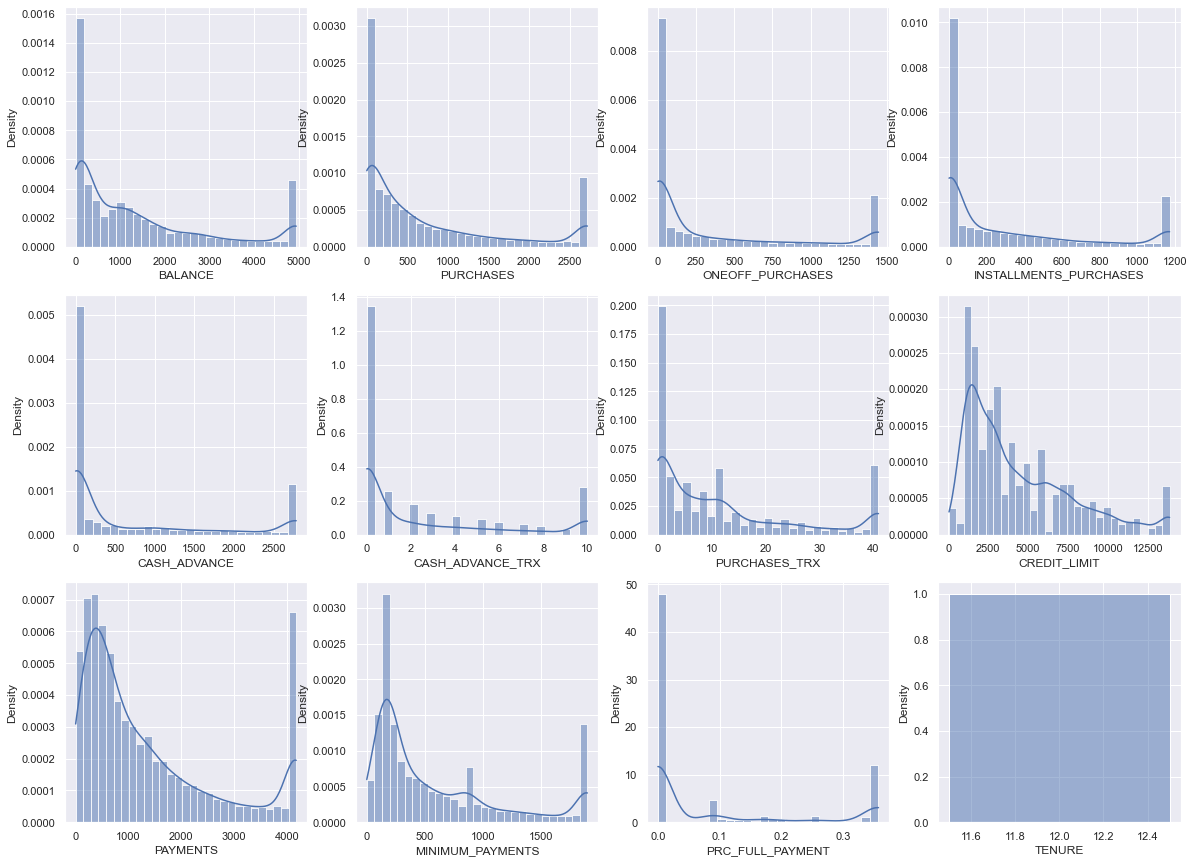

In [104]:
fig, axes = plt.subplots(3, 4, figsize=(20,15))
sns.histplot(ax=axes[0,0], data=lista_balance, stat="density", kde=True)
sns.histplot(ax=axes[0,1], data=lista_purchases, stat="density", kde=True)
sns.histplot(ax=axes[0,2], data=lista_oneoff, stat="density", kde=True)
sns.histplot(ax=axes[0,3], data=lista_installments, stat="density", kde=True)
sns.histplot(ax=axes[1,0], data=lista_cash, stat="density", kde=True)
sns.histplot(ax=axes[1,1], data=lista_cash_trx, stat="density", kde=True)
sns.histplot(ax=axes[1,2], data=lista_trx, stat="density", kde=True)
sns.histplot(ax=axes[1,3], data=lista_credit, stat="density", kde=True)
sns.histplot(ax=axes[2,0], data=lista_payments, stat="density", kde=True)
sns.histplot(ax=axes[2,1], data=lista_minimum, stat="density", kde=True)
sns.histplot(ax=axes[2,2], data=lista_prcfull, stat="density", kde=True)
sns.histplot(ax=axes[2,3], data=lista_tenure, stat="density", kde=True)

### 3.3 - Correlações

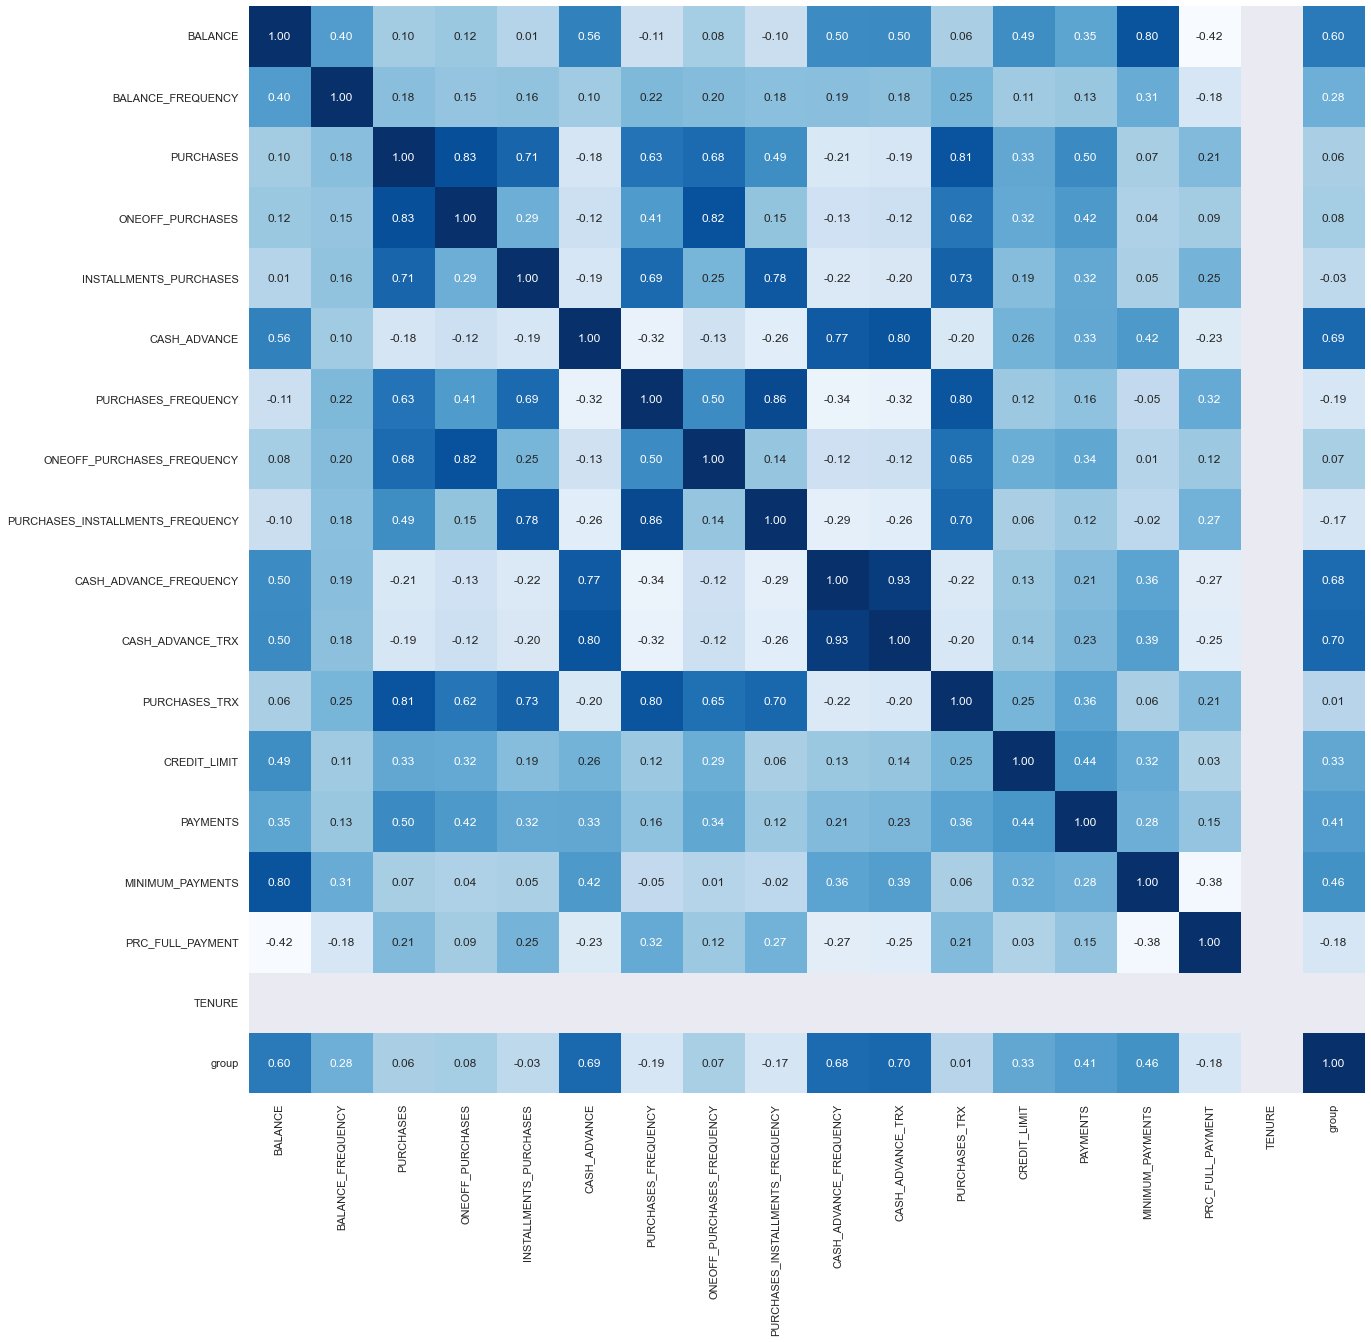

In [127]:
fig = plt.figure(figsize=(20,20))

corr = np.corrcoef(general_without_outlies.values, rowvar=False)
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=general_without_outlies.columns, yticklabels=general_without_outlies.columns)

fig.savefig('src/correlation.jpeg')

## 4. Clustering

In [80]:
inertias = []
valores_silhueta = []

for k in np.arange(2,10):
  kmeans = KMeans(n_clusters=k)
  labels = kmeans.fit_predict(general_scaled)
  inertias.append(kmeans.inertia_)
  media_silhueta = silhouette_score(general_scaled, labels)
  valores_silhueta.append(media_silhueta)

Text(0, 0.5, 'Inertia')

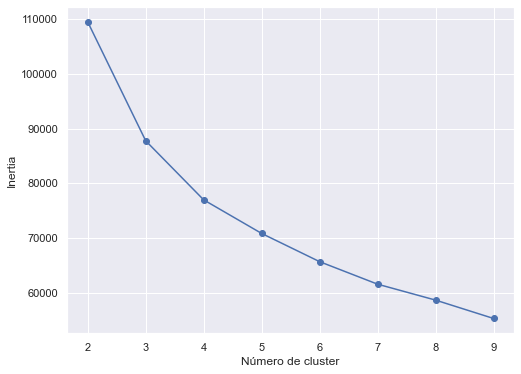

In [81]:
#Plotando o gráfico do Elbow Method
plt.figure(figsize=(8,6))
plt.plot(np.arange(2,10), inertias, '-o')
plt.xlabel('Número de cluster')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhueta')

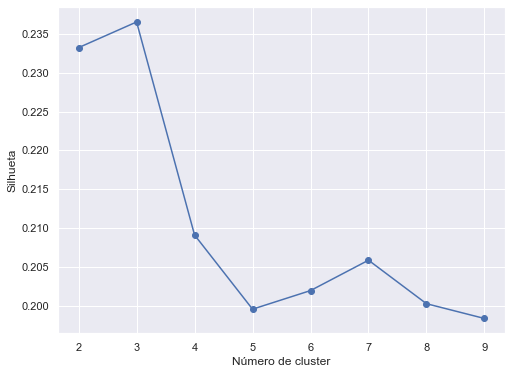

In [82]:
#Plotando o gráfico da Silhueta
plt.figure(figsize=(8,6))
plt.plot(np.arange(2,10), valores_silhueta, '-o')
plt.xlabel('Número de cluster')
plt.ylabel('Silhueta')

In [83]:
n_cluster = 3
kmeans = KMeans(n_clusters = n_cluster)
predict = kmeans.fit_predict(general_scaled)
general_scaled['group'] = predict

In [85]:
general_without_outlies['group'] = predict

In [86]:
general_without_outlies

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,group
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0
C10002,3202.467416,0.909091,0.00,0.000,0.00,2784.671635,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,2
C10003,2495.148862,1.000000,773.17,773.170,0.00,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,1
C10004,1666.670542,0.722223,1499.00,1444.575,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,0
C10005,817.714335,1.000000,16.00,16.000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.357143,12.0,0
C19187,19.183215,1.000000,300.00,0.000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,864.206542,0.000000,12.0,0
C19188,23.398673,0.833333,144.40,0.000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,12.0,0


In [87]:
general_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,group
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,-0.877887,-1.022232,-0.729778,-0.692329,-0.505286,-0.673526,-0.806649,-0.722810,-0.707409,-0.730019,-0.697305,-0.738061,-1.010503,-0.899957,-0.794165,-0.629326,0.0,0
C10002,1.178347,-0.202948,-0.838253,-0.692329,-0.746088,2.115243,-1.221928,-0.722810,-0.917090,0.717780,0.473022,-0.891422,0.762675,2.165124,0.836651,0.973858,0.0,2
C10003,0.718318,0.616337,0.040879,0.817575,-0.746088,-0.673526,1.269742,2.210769,-0.917090,-0.730019,-0.697305,0.028748,0.910439,-0.569767,0.058585,-0.629326,0.0,1
C10004,0.179488,-1.887032,0.866182,2.128745,-0.746088,-0.467436,-1.014290,-0.396858,-0.917090,-0.247421,-0.404724,-0.814741,0.910439,-1.058507,0.472782,-0.629326,0.0,0
C10005,-0.372660,0.616337,-0.820060,-0.661083,-0.746088,-0.673526,-1.014290,-0.396858,-0.917090,-0.730019,-0.697305,-0.814741,-0.951397,-0.525559,-0.610107,-0.629326,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,-0.885957,0.616337,-0.507235,-0.692329,-0.011263,-0.673526,1.269742,-0.722810,1.179720,-0.730019,-0.697305,-0.431337,-1.010503,-0.802697,-0.952597,1.947220,0.0,0
C19187,-0.892012,0.616337,-0.497138,-0.692329,0.011151,-0.673526,1.269742,-0.722810,1.179720,-0.730019,-0.697305,-0.431337,-1.010503,-0.841770,0.472782,-0.629326,0.0,0
C19188,-0.889270,-0.885689,-0.674063,-0.692329,-0.381604,-0.673526,0.854463,-0.722810,0.760359,-0.730019,-0.697305,-0.508018,-1.010503,-0.994655,-0.893975,1.174258,0.0,0


In [88]:
general_scaled_array = np.array(general_scaled)

In [89]:
general_scaled_array

array([[-0.87788709, -1.02223219, -0.72977835, ..., -0.62932646,
         0.        ,  0.        ],
       [ 1.17834699, -0.20294773, -0.83825273, ...,  0.97385822,
         0.        ,  2.        ],
       [ 0.71831794,  0.61633673,  0.04087871, ..., -0.62932646,
         0.        ,  1.        ],
       ...,
       [-0.88927017, -0.88568929, -0.67406299, ...,  1.17425811,
         0.        ,  0.        ],
       [-0.89573571, -0.88568929, -0.83825273, ...,  1.17425811,
         0.        ,  0.        ],
       [-0.66208473, -1.88703245,  0.40482506, ..., -0.62932646,
         0.        ,  0.        ]])

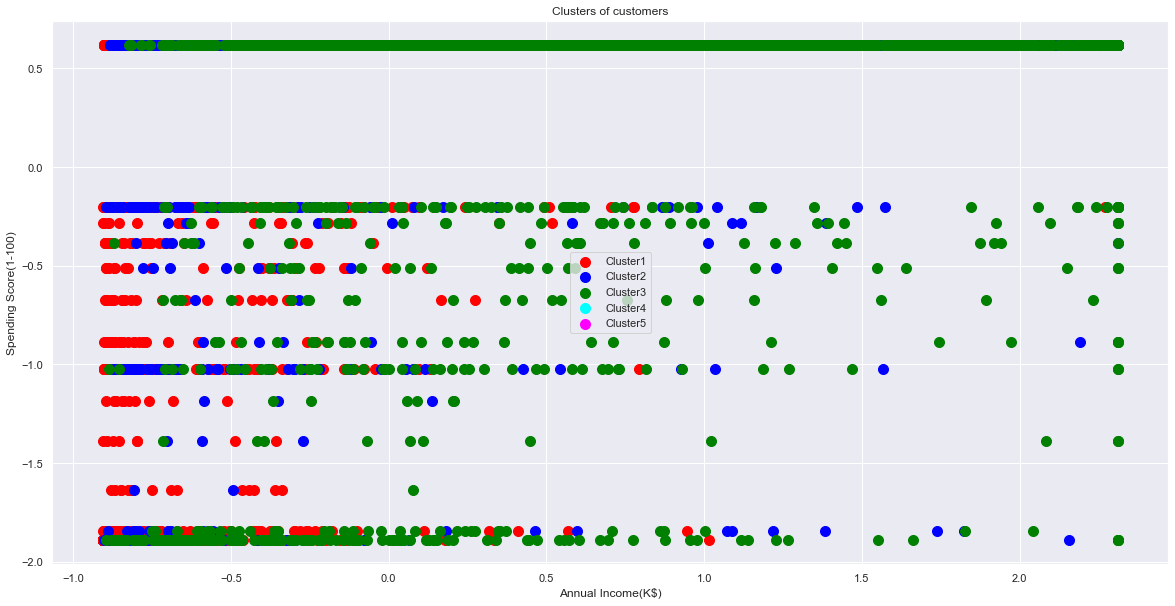

In [90]:
plt.figure(figsize=(20,10))
#Visualize the clusters
plt.scatter(general_scaled_array[predict==0,0],general_scaled_array[predict==0,1],s=100,c='red',label='Cluster1')
plt.scatter(general_scaled_array[predict==1,0],general_scaled_array[predict==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(general_scaled_array[predict==2,0],general_scaled_array[predict==2,1],s=100,c='green',label='Cluster3')
plt.scatter(general_scaled_array[predict==3,0],general_scaled_array[predict==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(general_scaled_array[predict==4,0],general_scaled_array[predict==4,1],s=100,c='magenta',label='Cluster5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [91]:
general_scaled_array = np.array(general_without_outlies)

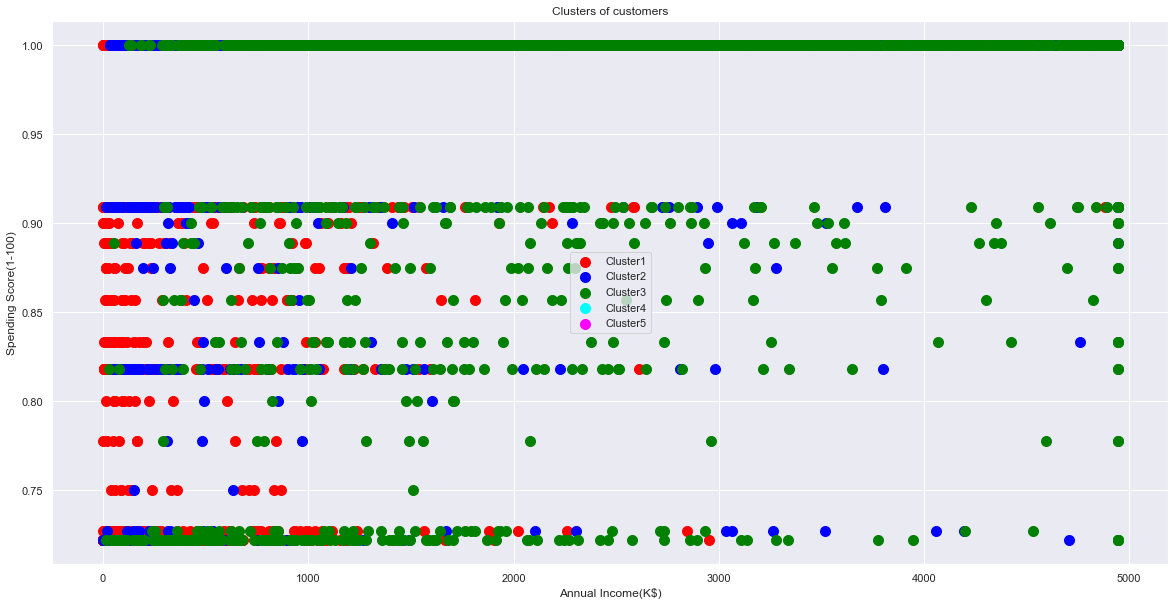

In [92]:
plt.figure(figsize=(20,10))
#Visualize the clusters
plt.scatter(general_scaled_array[predict==0,0],general_scaled_array[predict==0,1],s=100,c='red',label='Cluster1')
plt.scatter(general_scaled_array[predict==1,0],general_scaled_array[predict==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(general_scaled_array[predict==2,0],general_scaled_array[predict==2,1],s=100,c='green',label='Cluster3')
plt.scatter(general_scaled_array[predict==3,0],general_scaled_array[predict==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(general_scaled_array[predict==4,0],general_scaled_array[predict==4,1],s=100,c='magenta',label='Cluster5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [94]:
general_without_outlies.groupby('group').count()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
group,,,,,,,,,,,,,,,,,
0,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600
1,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033
2,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316


In [95]:
general_without_outlies.groupby('group').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
group,,,,,,,,,,,,,,,,,
0,565.634681,0.895628,392.887471,176.489480,205.521203,169.087510,0.459311,0.104058,0.347003,0.042368,0.656304,7.406087,3051.744587,694.370578,357.181819,0.098834,12.0
1,1711.399348,0.979235,2093.205086,1000.564611,747.471849,394.670489,0.908886,0.488343,0.694651,0.071396,1.370880,30.411707,6419.592631,2389.765246,681.555307,0.129383,12.0
2,2747.910010,0.961272,230.828590,141.011308,77.788385,1916.392367,0.184820,0.078693,0.109359,0.340258,6.702073,3.513817,5379.629193,1728.921260,986.634321,0.027191,12.0
